In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Data Generation

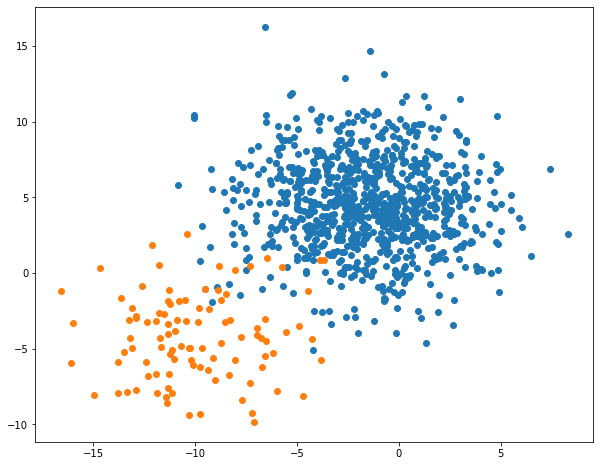

In [2]:
X, y = make_blobs(n_samples=[900, 100], centers=None, n_features=2, random_state=1, cluster_std=3)

fig, ax = plt.subplots(figsize=(10, 8))
for class_value in range(2):
    row_ix = np.where(y == class_value)
    ax.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
plt.show()

## DummyClassifier

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
clf = DummyClassifier(strategy="most_frequent")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9

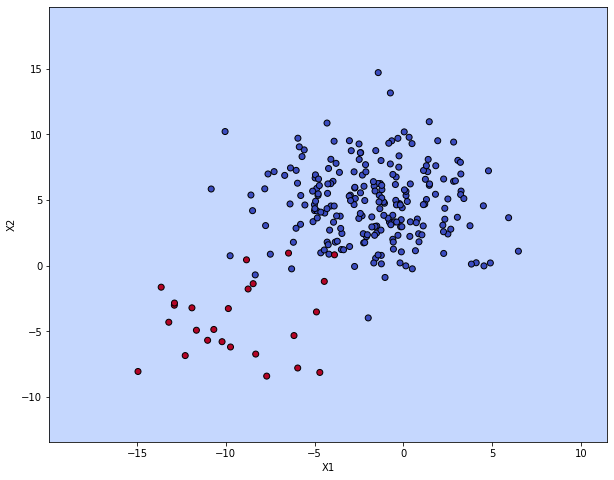

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
disp = DecisionBoundaryDisplay.from_estimator(clf, 
                                              X_test, 
                                              response_method="predict",
                                              xlabel="X1", ylabel="X2",
                                              alpha=0.5,
                                              eps=5,
                                              cmap=plt.cm.coolwarm,
                                              ax=ax)
   
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], 
                 c=y_test, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

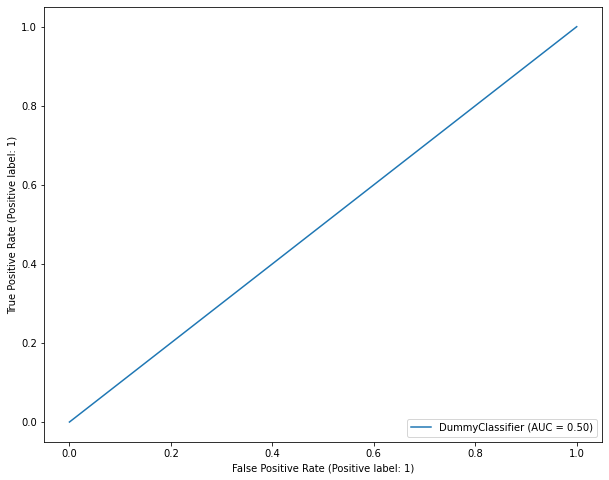

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)
plt.show()

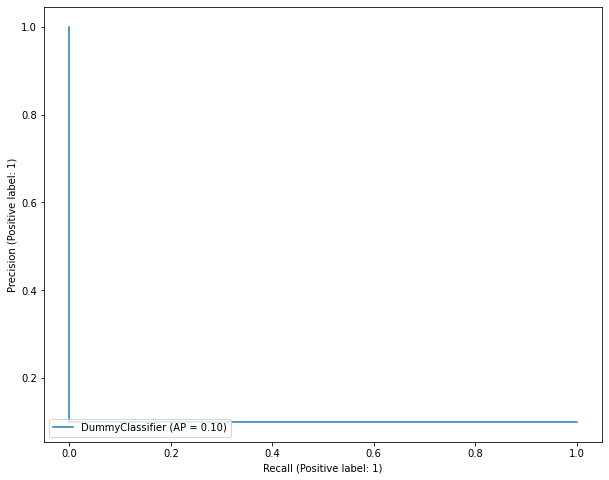

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax)
plt.show()

## RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.968

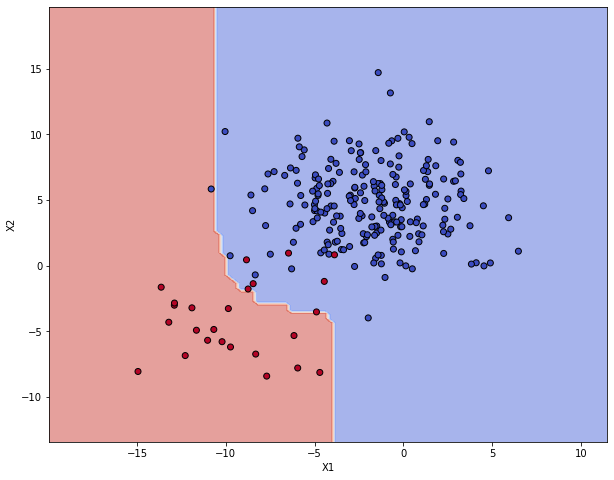

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
disp = DecisionBoundaryDisplay.from_estimator(clf, 
                                              X_test, 
                                              response_method="predict",
                                              xlabel="X1", ylabel="X2",
                                              alpha=0.5,
                                              eps=5,
                                              cmap=plt.cm.coolwarm,
                                              ax=ax)
   
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], 
                 c=y_test, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

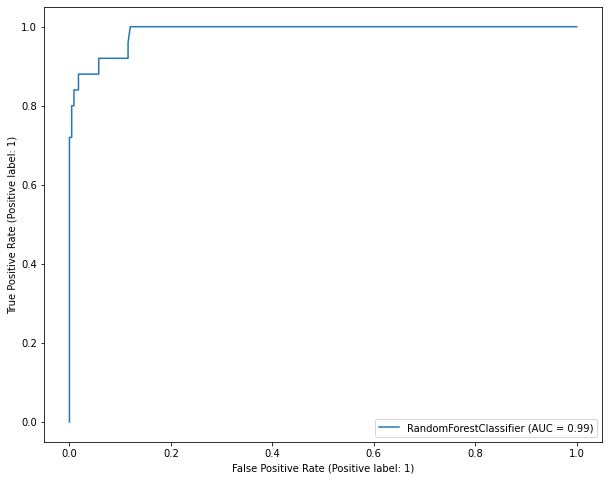

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)
plt.show()

If we are concerned about TP, FP, FN but not TN, precision/recall curve can be used.
This is usually expected for imbalanced data.

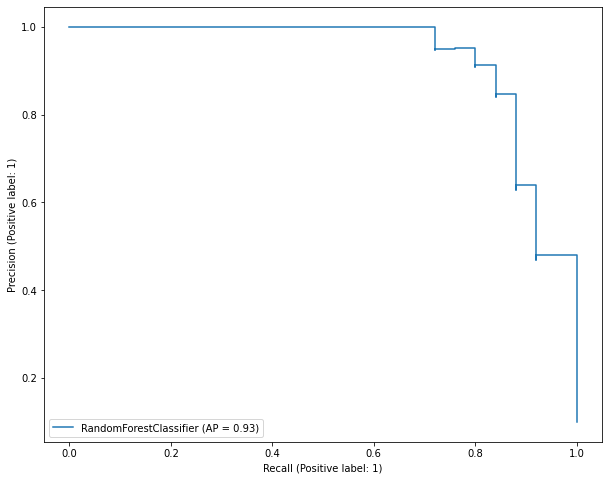

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax)
plt.show()